<div style='background-color : lightgreen'>
    <a id='TableOfContents'></a>
    <h1 style='text-align : center; padding-top: 20px; font-family: cursive;'>
        Table of Contents
    </h1>
    <ul style='list-style-type:none; display: flex; justify-content: center; margin-bottom: 30px;padding-left: 100px;'>
        <li style='margin-right: 20px;'><a href='#imports'>Imports</a></li>
        <li style='margin-right: 20px;'><a href='#q1'>Question 1</a></li>
        <li style='margin-right: 20px;'><a href='#q2'>Question 2</a></li>
        <li style='margin-right: 20px;'><a href='#q3'>Question 3</a></li>
        <li style='margin-right: 20px;'><a href='#q4'>Question 4</a></li>
        <li style='margin-right: 20px;'><a href='#q5'>Question 5</a></li>
        <li style='margin-right: 20px;'><a href='#q6'>Question 6</a></li>
        <li style='margin-right: 20px;'><a href='#q7'>Question 7</a></li>
        <li style='margin-right: 20px;'><a href='#q8'>Question 8</a></li>
        <li><a href='#bonus'>Bonus</a></li>
    </ul>
</div>


<div style='background-color : lightblue'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import get_db_url

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

import acquire as a
import prepare as p

In [2]:
# setting basic style parameters for matplotlib
# plt.rc('figure', figsize=(13, 7))


<div style='background-color : lightblue'>
<a id='q1'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 1
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 1.</b> Spam Data: Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [3]:
url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url)
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def train_val_test(df, stratify=False, target=None):
    train_validate, test = train_test_split(df,
                                            random_state=706,
                                            train_size=0.8,
                                            stratify=df[target] if stratify else None)
    train, val = train_test_split(train_validate,
                                  random_state=706,
                                  train_size=0.7,
                                  stratify=train_validate[target] if stratify else None)
    return train, val, test


In [5]:
train, val, test = train_val_test(df, stratify=True, target='label')

In [6]:
train.shape, val.shape, test.shape

((3119, 3), (1338, 3), (1115, 3))

In [7]:
ham_df = train[train.label=='ham']

In [8]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
ham_words = clean(' '.join(train[train.label=='ham']['text']))
spam_words = clean(' '.join(train[train.label=='spam']['text']))
all_words = clean(' '.join(train['text']))

In [10]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
word_counts = pd.concat([ham_freq, spam_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,257,5,262
get,180,45,225
ok,149,2,151
go,149,18,167
dont,148,14,162


In [12]:
word_counts.sort_values('all', ascending=False).head()

,ham,spam,all
call,138,193,331
im,257,5,262
ur,140,94,234
get,180,45,225
4,101,70,171


<AxesSubplot:>

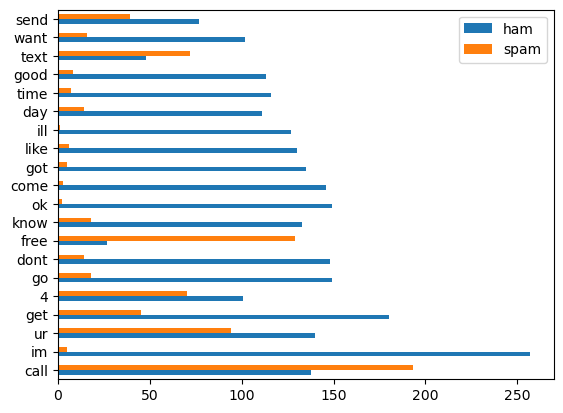

In [13]:
word_counts.sort_values('all', ascending=False
                       )[['ham','spam']].head(20).plot.barh()

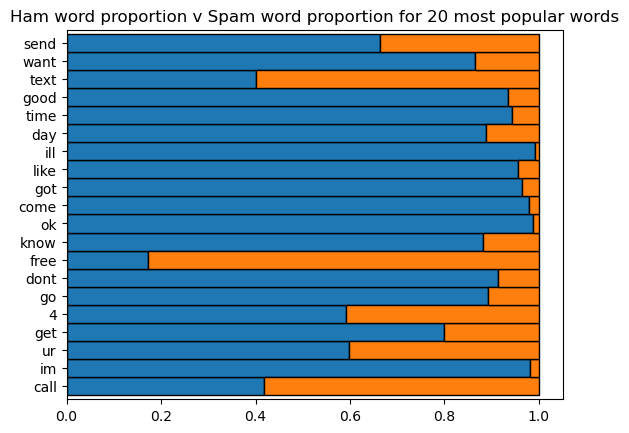

In [14]:
word_counts.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['ham','spam']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1).set(title='Ham word proportion v Spam word proportion for 20 most popular words');
                                                         

<AxesSubplot:>

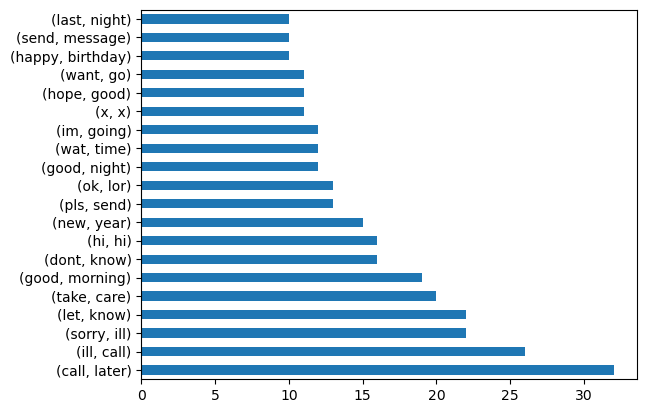

In [15]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(20).plot.barh()

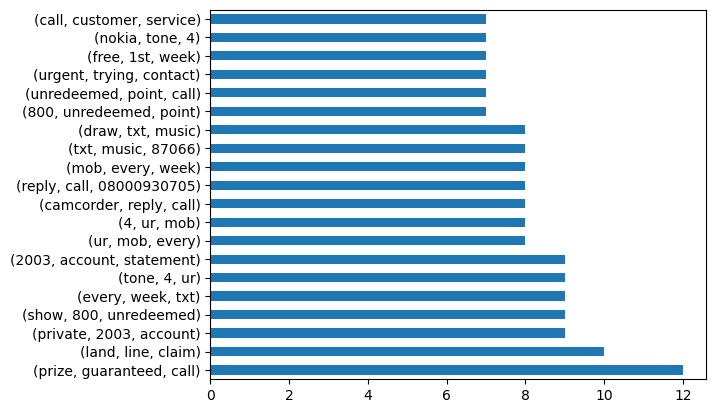

In [16]:
pd.Series(nltk.ngrams(spam_words, 3)
         ).value_counts().head(20).plot.barh()
plt.show()

In [17]:
# wordcloud expects a single string
img = WordCloud(background_color='White',
         ).generate(' '.join(ham_words))

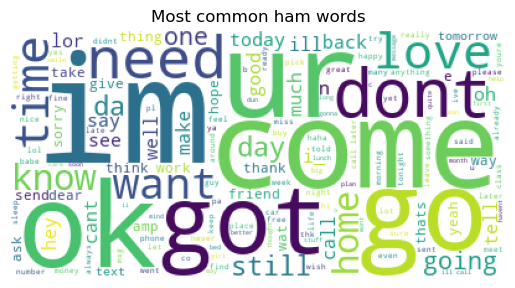

In [18]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham words')
plt.show()

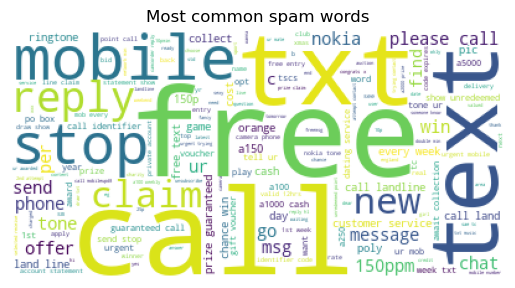

In [19]:
img = WordCloud(background_color='White',
         ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common spam words')
plt.show()

<div style='background-color : lightblue'>
<a id='q2'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 2
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 2.</b> Explore the blog articles using the techniques discussed in the exploration lesson.

In [20]:
blogs = a.get_blogs()

In [21]:
blogs.head()

,title,content
0,Women in tech: Panelist Spotlight – Magdalena ...,Magdalena Rahn is a current Codeup student in ...
1,Women in tech: Panelist Spotlight – Rachel Rob...,Rachel recently joined USAA’s Data Science Del...
2,Women in tech: Panelist Spotlight – Sarah Mellor,We asked Sarah how Codeup has impacted her car...
3,Women in tech: Panelist Spotlight – Madeleine ...,Madeleine attended Codeup as a student in earl...
4,Black excellence in tech: Panelist Spotlight –...,Wilmarie De La Cruz Mejia is a current Codeup ...


<div style='background-color : lightblue'>
<a id='q3'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Question 3
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 3.</b> Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [22]:
train, val, test = p.articles_split()

In [23]:
train.shape, val.shape, test.shape

((165, 3), (72, 3), (60, 3))

In [24]:
train.head()

,title,content,category
87,Our borders aren't open: US secy after changin...,US Homeland Security Secretary Alejandro Mayor...,world
262,Vast Space to launch 1st private station on Sp...,California-based Vast Space plans to launch th...,science
216,Mamata Banerjee walks on treadmill holding her...,West Bengal Chief Minister Mamata Banerjee on ...,miscellaneous
196,Getting used to the word blockbuster: Adah on ...,"Adah Sharma, reacting to the success of her la...",entertainment
106,UP CM Yogi Adityanath watches 'The Kerala Stor...,Uttar Pradesh CM Yogi Adityanath on Friday wat...,politics


In [25]:
train.category.value_counts()

world            14
science          14
entertainment    14
politics         14
business         14
sports           14
national         14
hatke            14
technology       14
miscellaneous    13
startup          13
automobile       13
Name: category, dtype: int64

In [26]:
world_words = clean(' '.join(train[train.category=='world']['content']))
science_words = clean(' '.join(train[train.category=='science']['content']))
miscellaneous_words = clean(' '.join(train[train.category=='miscellaneous']['content']))
entertainment_words = clean(' '.join(train[train.category=='entertainment']['content']))
politics_words = clean(' '.join(train[train.category=='politics']['content']))
business_words = clean(' '.join(train[train.category=='business']['content']))
sports_words = clean(' '.join(train[train.category=='sports']['content']))
national_words = clean(' '.join(train[train.category=='sports']['content']))
hatke_words = clean(' '.join(train[train.category=='hatke']['content']))
technology_words = clean(' '.join(train[train.category=='technology']['content']))
startup_words = clean(' '.join(train[train.category=='startup']['content']))
automobile_words = clean(' '.join(train[train.category=='automobile']['content']))

In [27]:
all_words = clean(' '.join(train['content']))

In [28]:
world_freq = pd.Series(world_words).value_counts()
science_freq = pd.Series(science_words).value_counts()
miscellaneous_freq = pd.Series(miscellaneous_words).value_counts()
entertainment_freq = pd.Series(entertainment_words ).value_counts()
politics_freq = pd.Series(politics_words).value_counts()
business_freq = pd.Series(business_words).value_counts()
sports_freq = pd.Series(sports_words).value_counts()
national_freq = pd.Series(national_words).value_counts()
hatke_freq = pd.Series(hatke_words).value_counts()
technology_freq = pd.Series(technology_words).value_counts()
startup_freq = pd.Series(startup_words).value_counts()
automobile_freq = pd.Series(automobile_words).value_counts()
all_words_freq = pd.Series(all_words).value_counts()


In [29]:
world_freq

russia     9
said       9
state      7
russian    5
also       5
          ..
pas        1
341        1
voted      1
senate     1
notably    1
Length: 358, dtype: int64

In [46]:
cols_list = train.category.unique().tolist()

In [31]:
word_counts = pd.concat([world_freq, science_freq, miscellaneous_freq, entertainment_freq, politics_freq, business_freq, sports_freq, national_freq, hatke_freq, technology_freq, startup_freq, automobile_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = train.category.unique().tolist()
word_counts.head()

,world,science,miscellaneous,entertainment,politics,business,sports,startup,national,automobile,hatke,technology
russia,9,0,0,0,0,0,0,0,0,0,0,0
said,9,2,4,15,14,10,13,13,4,11,9,9
state,7,0,0,0,1,1,0,0,2,2,1,0
russian,5,0,0,0,0,0,0,0,0,0,0,0
also,5,0,2,1,2,3,1,1,1,4,5,0


In [32]:
word_counts['all'] = all_words_freq

In [33]:
word_counts

,world,science,miscellaneous,entertainment,politics,business,sports,startup,national,automobile,hatke,technology,all
russia,9,0,0,0,0,0,0,0,0,0,0,0,9
said,9,2,4,15,14,10,13,13,4,11,9,9,111
state,7,0,0,0,1,1,0,0,2,2,1,0,15
russian,5,0,0,0,0,0,0,0,0,0,0,0,5
also,5,0,2,1,2,3,1,1,1,4,5,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
accused,0,0,0,0,0,0,0,0,0,0,0,1,3
critic,0,0,0,0,0,0,0,0,0,0,0,1,1
indianamerican,0,0,0,0,0,0,0,0,0,0,0,1,1
defamation,0,0,0,0,0,0,0,0,0,0,0,1,2


In [34]:
word_counts.sort_values('all', ascending=False).head()

,world,science,miscellaneous,entertainment,politics,business,sports,startup,national,automobile,hatke,technology,all
said,9,2,4,15,14,10,13,13,4,11,9,9,111
added,2,2,0,11,9,2,3,3,1,2,4,2,39
india,1,0,0,1,0,5,3,3,0,4,8,8,32
company,0,0,3,1,0,7,0,0,0,6,6,6,29
court,4,0,0,0,10,2,1,1,0,0,3,0,27


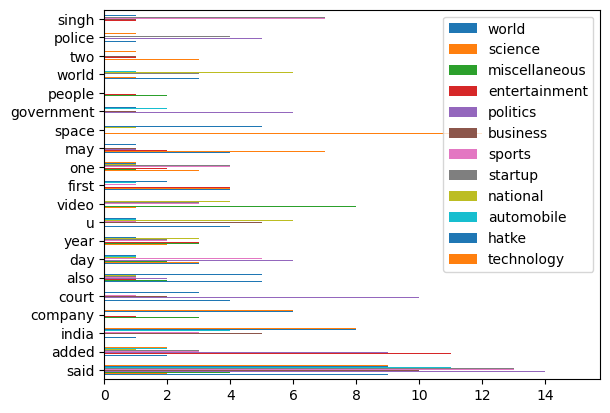

In [35]:
word_counts.sort_values('all', ascending=False
                       )[word_counts.drop(columns='all').columns.tolist()].head(20).plot.barh()
plt.show()

In [36]:
cat_words_list = [world_words, science_words, miscellaneous_words, entertainment_words, politics_words, business_words, sports_words, startup_words, national_words, automobile_words, hatke_words, technology_words]

In [47]:
len(cat_words_list)

12

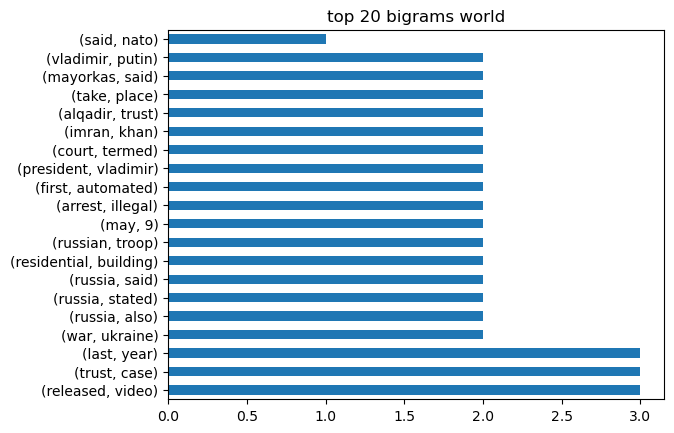

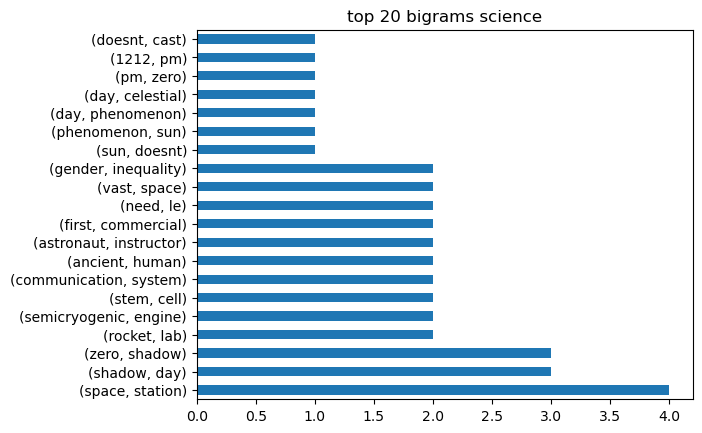

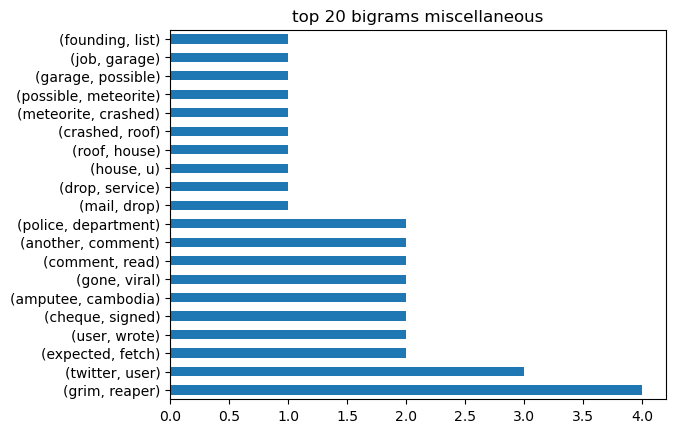

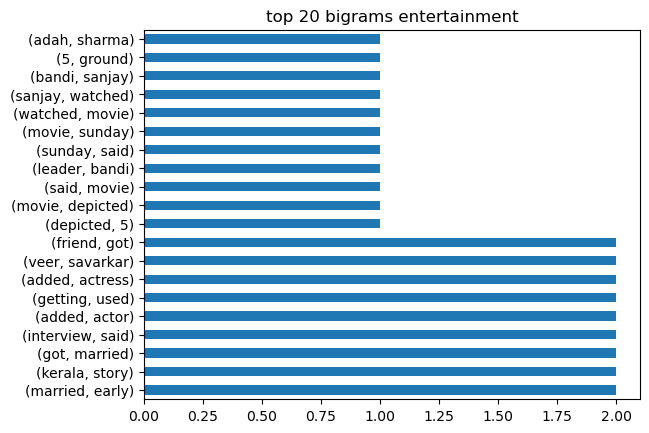

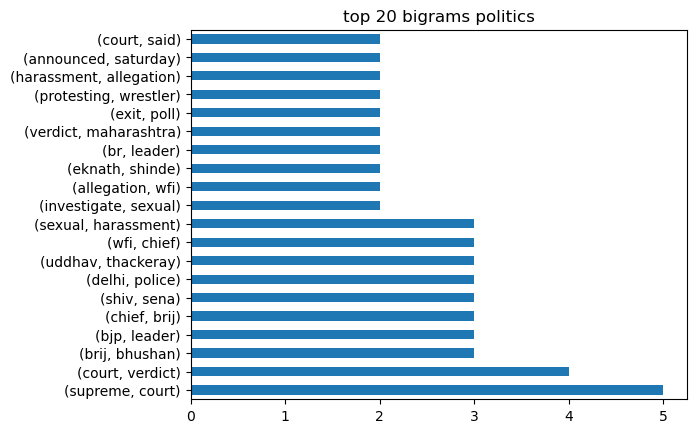

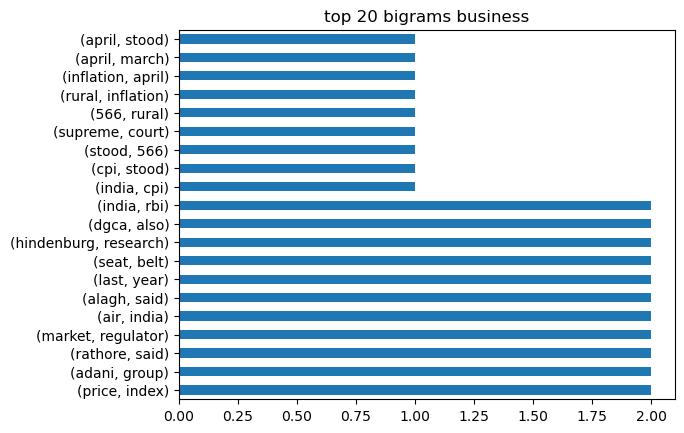

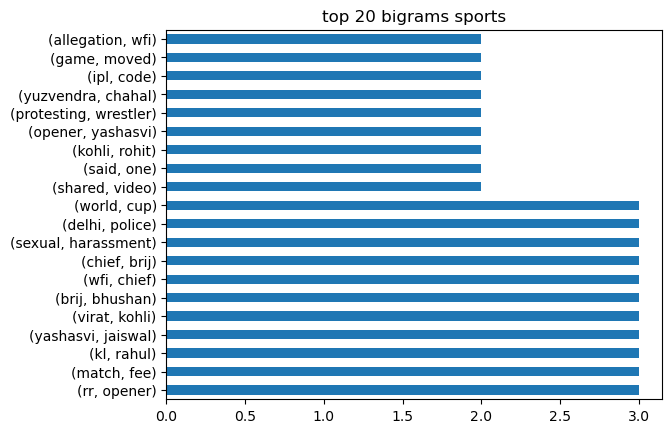

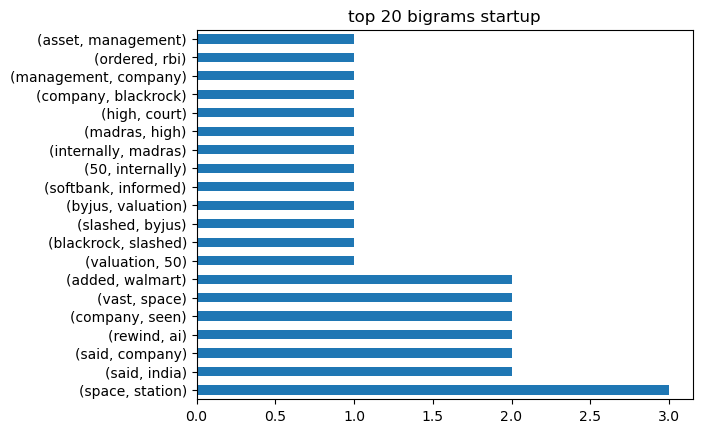

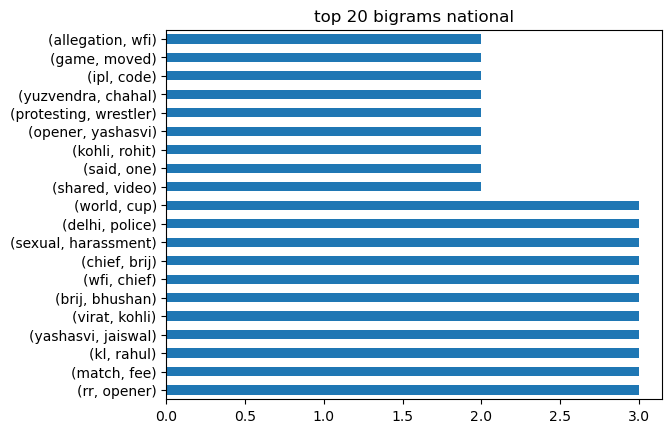

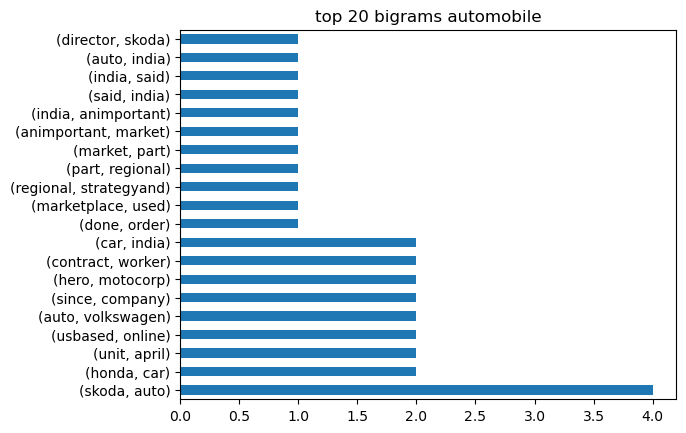

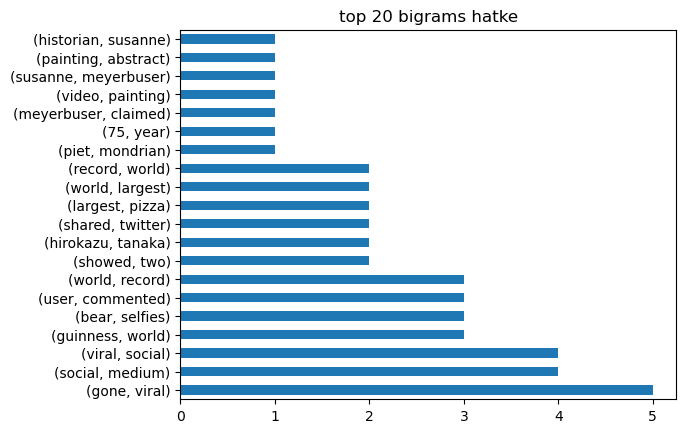

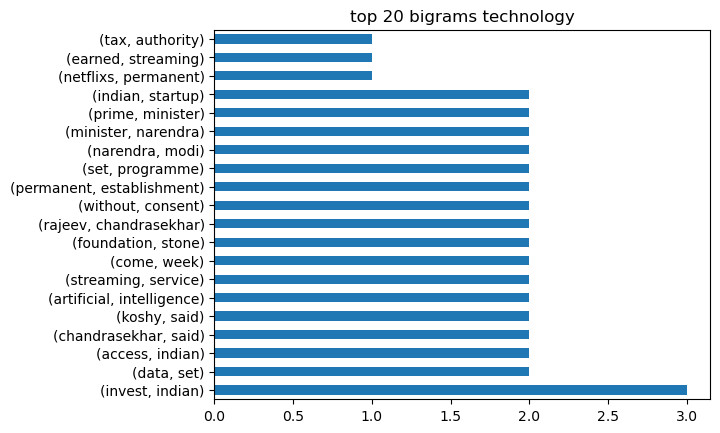

In [50]:
for i in range(12):
    pd.Series(nltk.bigrams(cat_words_list[i])).value_counts().head(20).plot.barh()
    plt.title(f'top 20 bigrams {cols_list[i]}')
    plt.show()

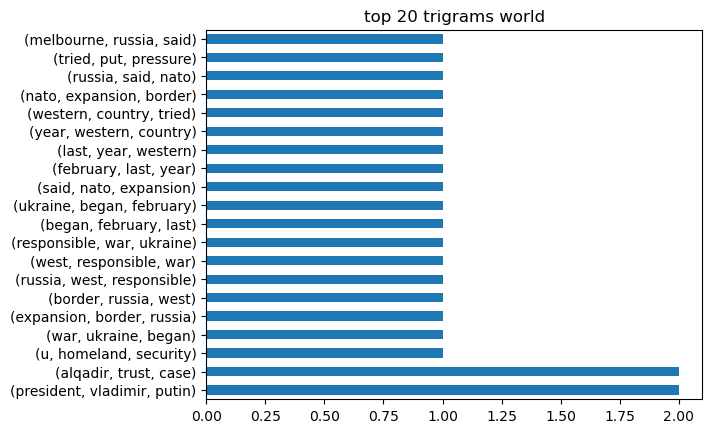

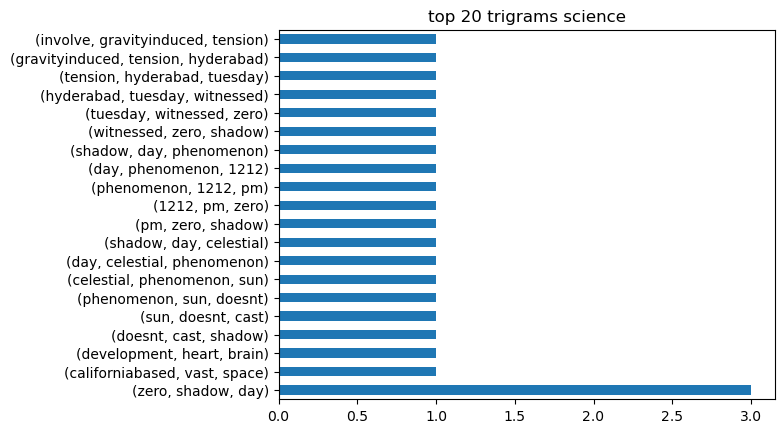

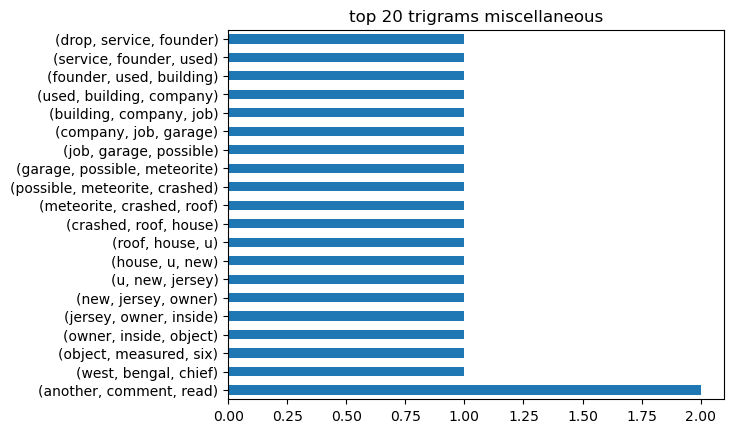

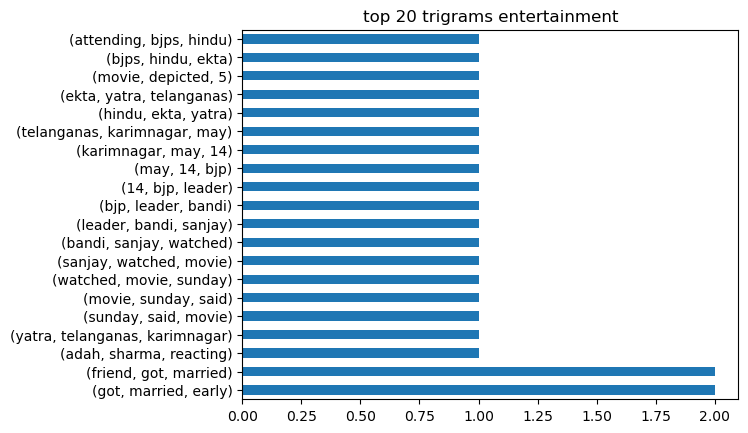

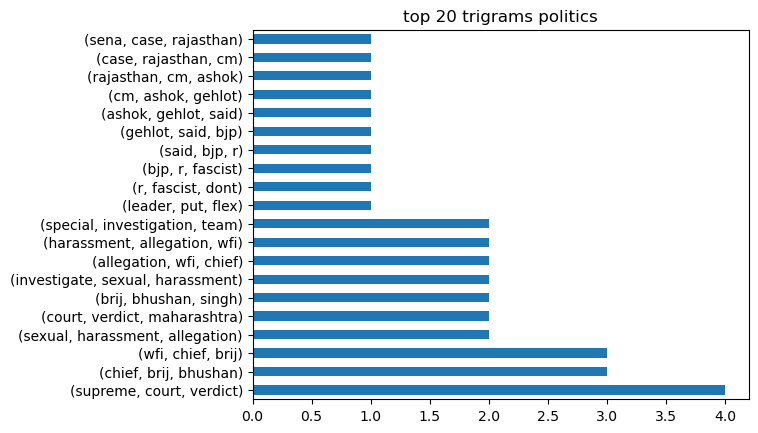

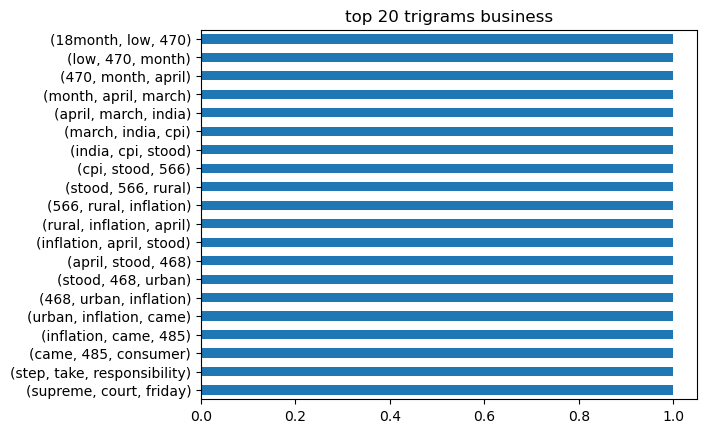

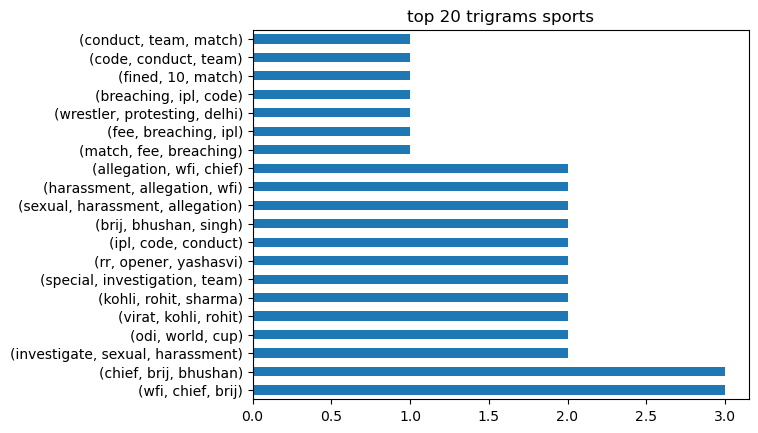

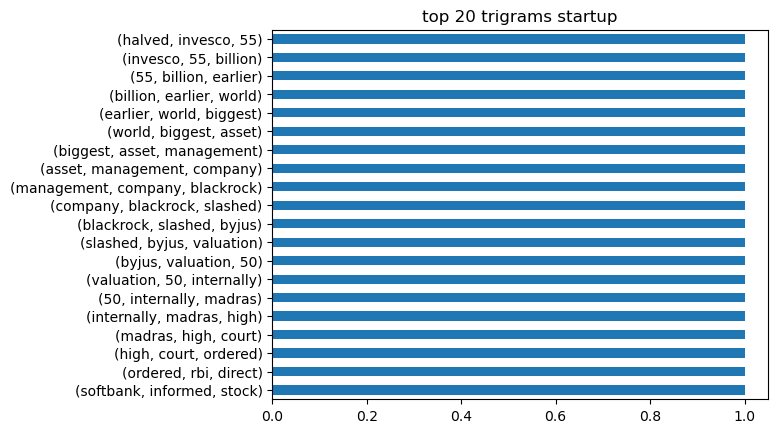

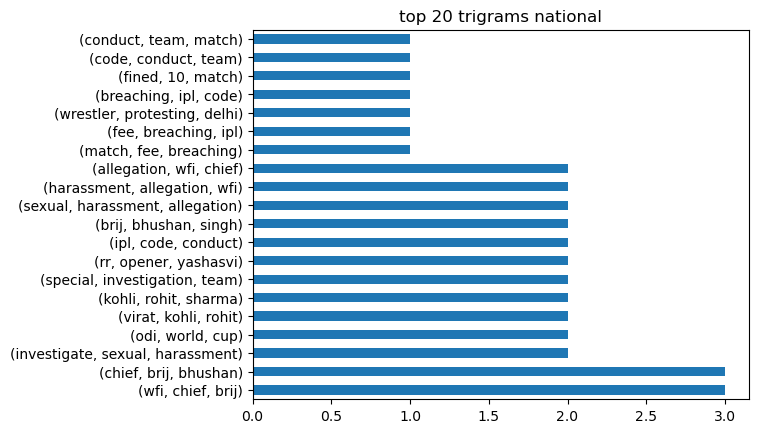

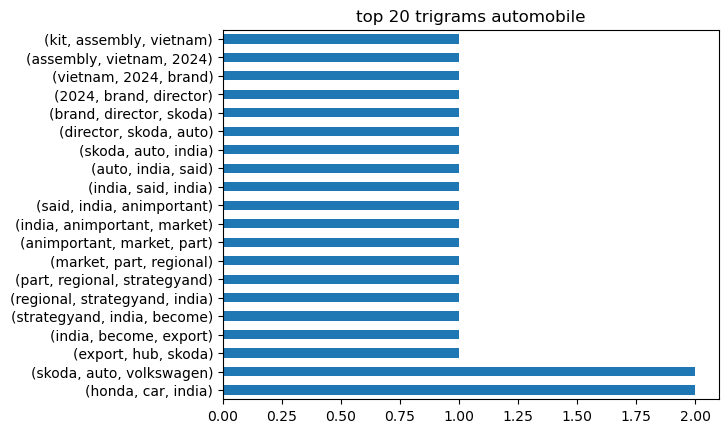

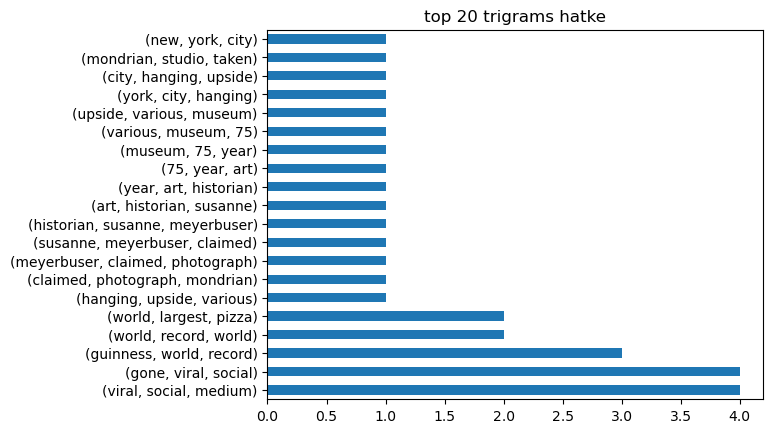

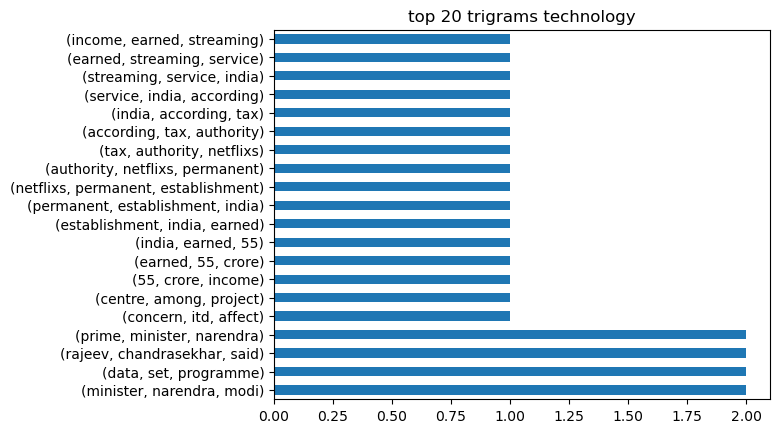

In [51]:
for i in range(12):
    pd.Series(nltk.ngrams(cat_words_list[i], 3)).value_counts().head(20).plot.barh()
    plt.title(f'top 20 trigrams {cols_list[i]}')
    plt.show()

<div style='background-color : lightblue'>
    <a id='q4'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;'>
        Question 4
    </h1></i></u></b>
    <li><a href='#TableOfContents'>Table of Contents</a></li>
</div>


<b>Question 4.</b> 

<div style='background-color : lightblue'>
<a id='q5'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 5
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 5.</b> 

<div style='background-color : lightblue'>
<a id='q6'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 6
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 6.</b> 

<div style='background-color : lightblue'>
<a id='q7'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 7
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 7.</b> 

<div style='background-color : lightblue'>
<a id='q8'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 8
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 8.</b> 

<div style='background-color : lightblue'>
<a id='q9'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Question 9
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<b>Question 9.</b>  



<div style='background-color : lightblue'>
<a id='bonus'></a>
    <b><u><i><h1 style='text-align : center; padding-top: 25px;''>
        Bonus
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>